In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': "#150e0d"}, style='darkgrid')

In [4]:
df=pd.read_csv(r"D:\intern code aloha\data\heart\archive (2)\Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv")
df


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [5]:
print(df.shape)
df.info()

(1000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [6]:
df.dtypes

patientid              int64
age                    int64
gender                 int64
chestpain              int64
restingBP              int64
serumcholestrol        int64
fastingbloodsugar      int64
restingrelectro        int64
maxheartrate           int64
exerciseangia          int64
oldpeak              float64
slope                  int64
noofmajorvessels       int64
target                 int64
dtype: object

In [7]:
obj_features=['gender','target','exerciseangia','fastingbloodsugar',]
df[obj_features]=df[obj_features].astype('object')

In [8]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [9]:
for d in df.items():
    print(type(d[1]))
    break
df.ffill(inplace=True)

<class 'pandas.core.series.Series'>


C:\Users\kavik\AppData\Local\Temp\ipykernel_12012\3672022164.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.ffill(inplace=True)


In [10]:
for element in obj_features:
    if element=='gender':
        if (df[element]==0).any():
            df[element]=df[element].replace(0,'female')
        if (df[element]==1).any():
            df[element]=df[element].replace(1,'male')
    if element=='fastingbloodsugar':
        if (df[element]==0).any():
            df[element]=df[element].replace(0,'false')
        if (df[element]==1).any():
            df[element]=df[element].replace(1,'true')
    if element=='target':
        if (df[element]==0).any():
            df[element]=df[element].replace(0,'no')
        if (df[element]==1).any():
            df[element]=df[element].replace(1,'yes')
    

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0
oldpeak,1000.0,2.707700e+00,1.720753e+00,0.0,1.30,2.4,4.10,6.2
slope,1000.0,1.540000e+00,1.003697e+00,0.0,1.00,2.0,2.00,3.0


In [12]:
df.describe(include='object')

,gender,fastingbloodsugar,target
count,1000,1000,1000
unique,2,2,2
top,male,false,yes
freq,765,704,580


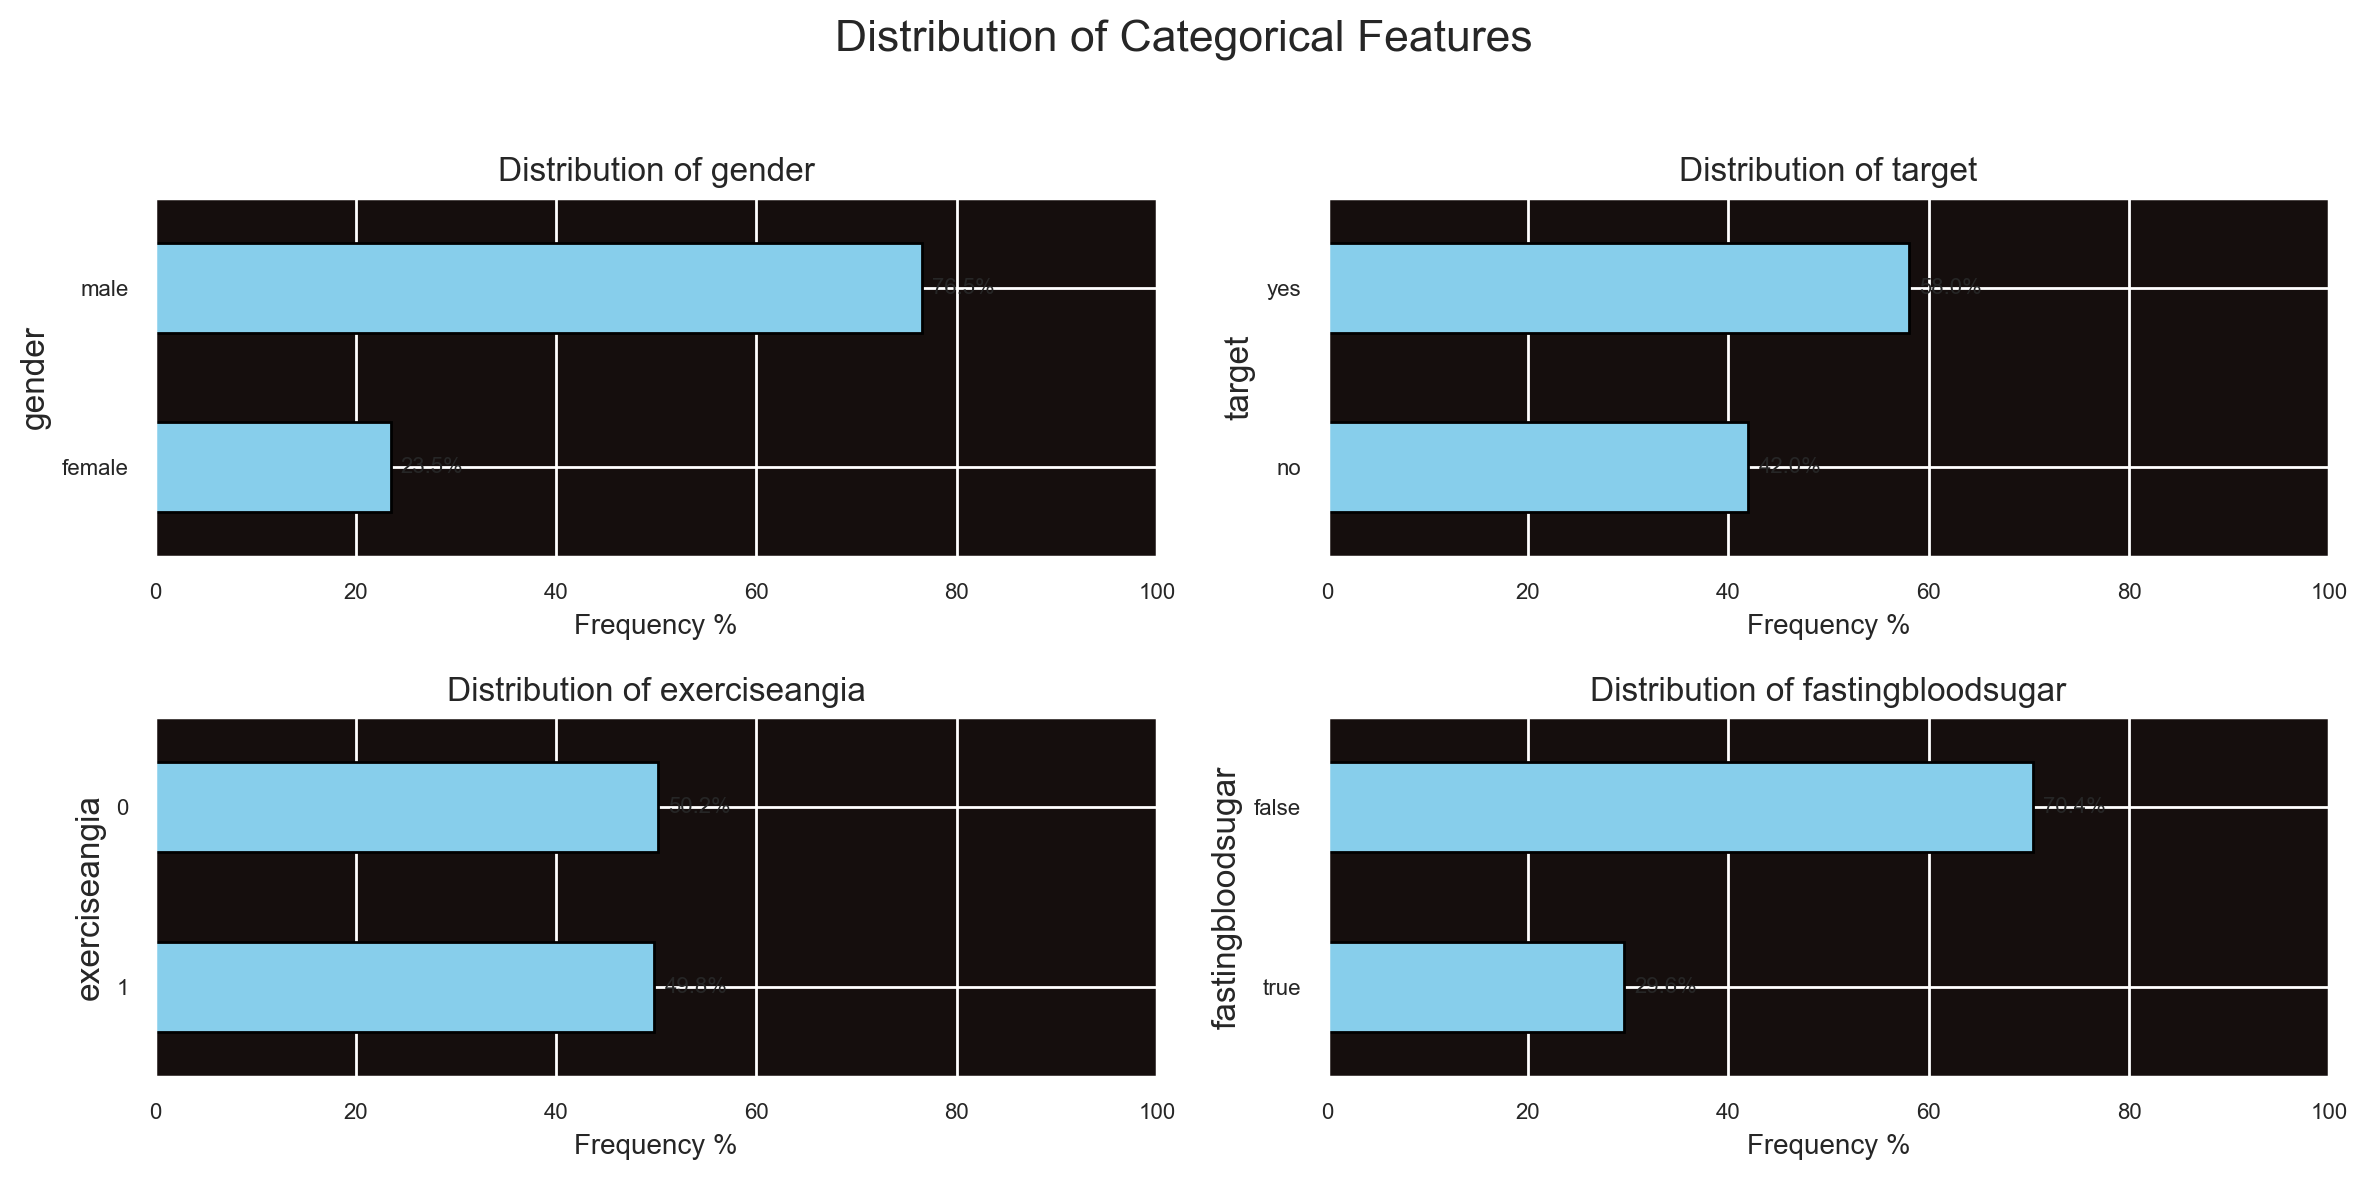

In [13]:
import matplotlib.pyplot as plt

# Assuming obj_features is your list of categorical columns
df_categorical = df[obj_features]

# Set up the layout: auto-fit based on number of features
n_cols = 2
n_rows = (len(obj_features) + 1) // n_cols  # ensures enough rows
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 3))

# Flatten axes array for easy indexing
ax = ax.flatten()

# Plot each categorical variable
for i, col in enumerate(obj_features):
    value_counts = df[col].value_counts(normalize=True).mul(100).sort_values()

    # Plot
    value_counts.plot(kind='barh', ax=ax[i], width=0.5, color='skyblue', edgecolor='black')

    # Add labels
    for index, value in enumerate(value_counts):
        ax[i].text(value + 1, index, f'{value:.1f}%', va='center', fontsize=8)

    ax[i].set_xlim([0, 100])
    ax[i].set_xlabel('Frequency %', fontsize=10)
    ax[i].set_title(f'Distribution of {col}', fontsize=12)
    ax[i].tick_params(labelsize=8)

# Hide any unused subplots
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.suptitle('Distribution of Categorical Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


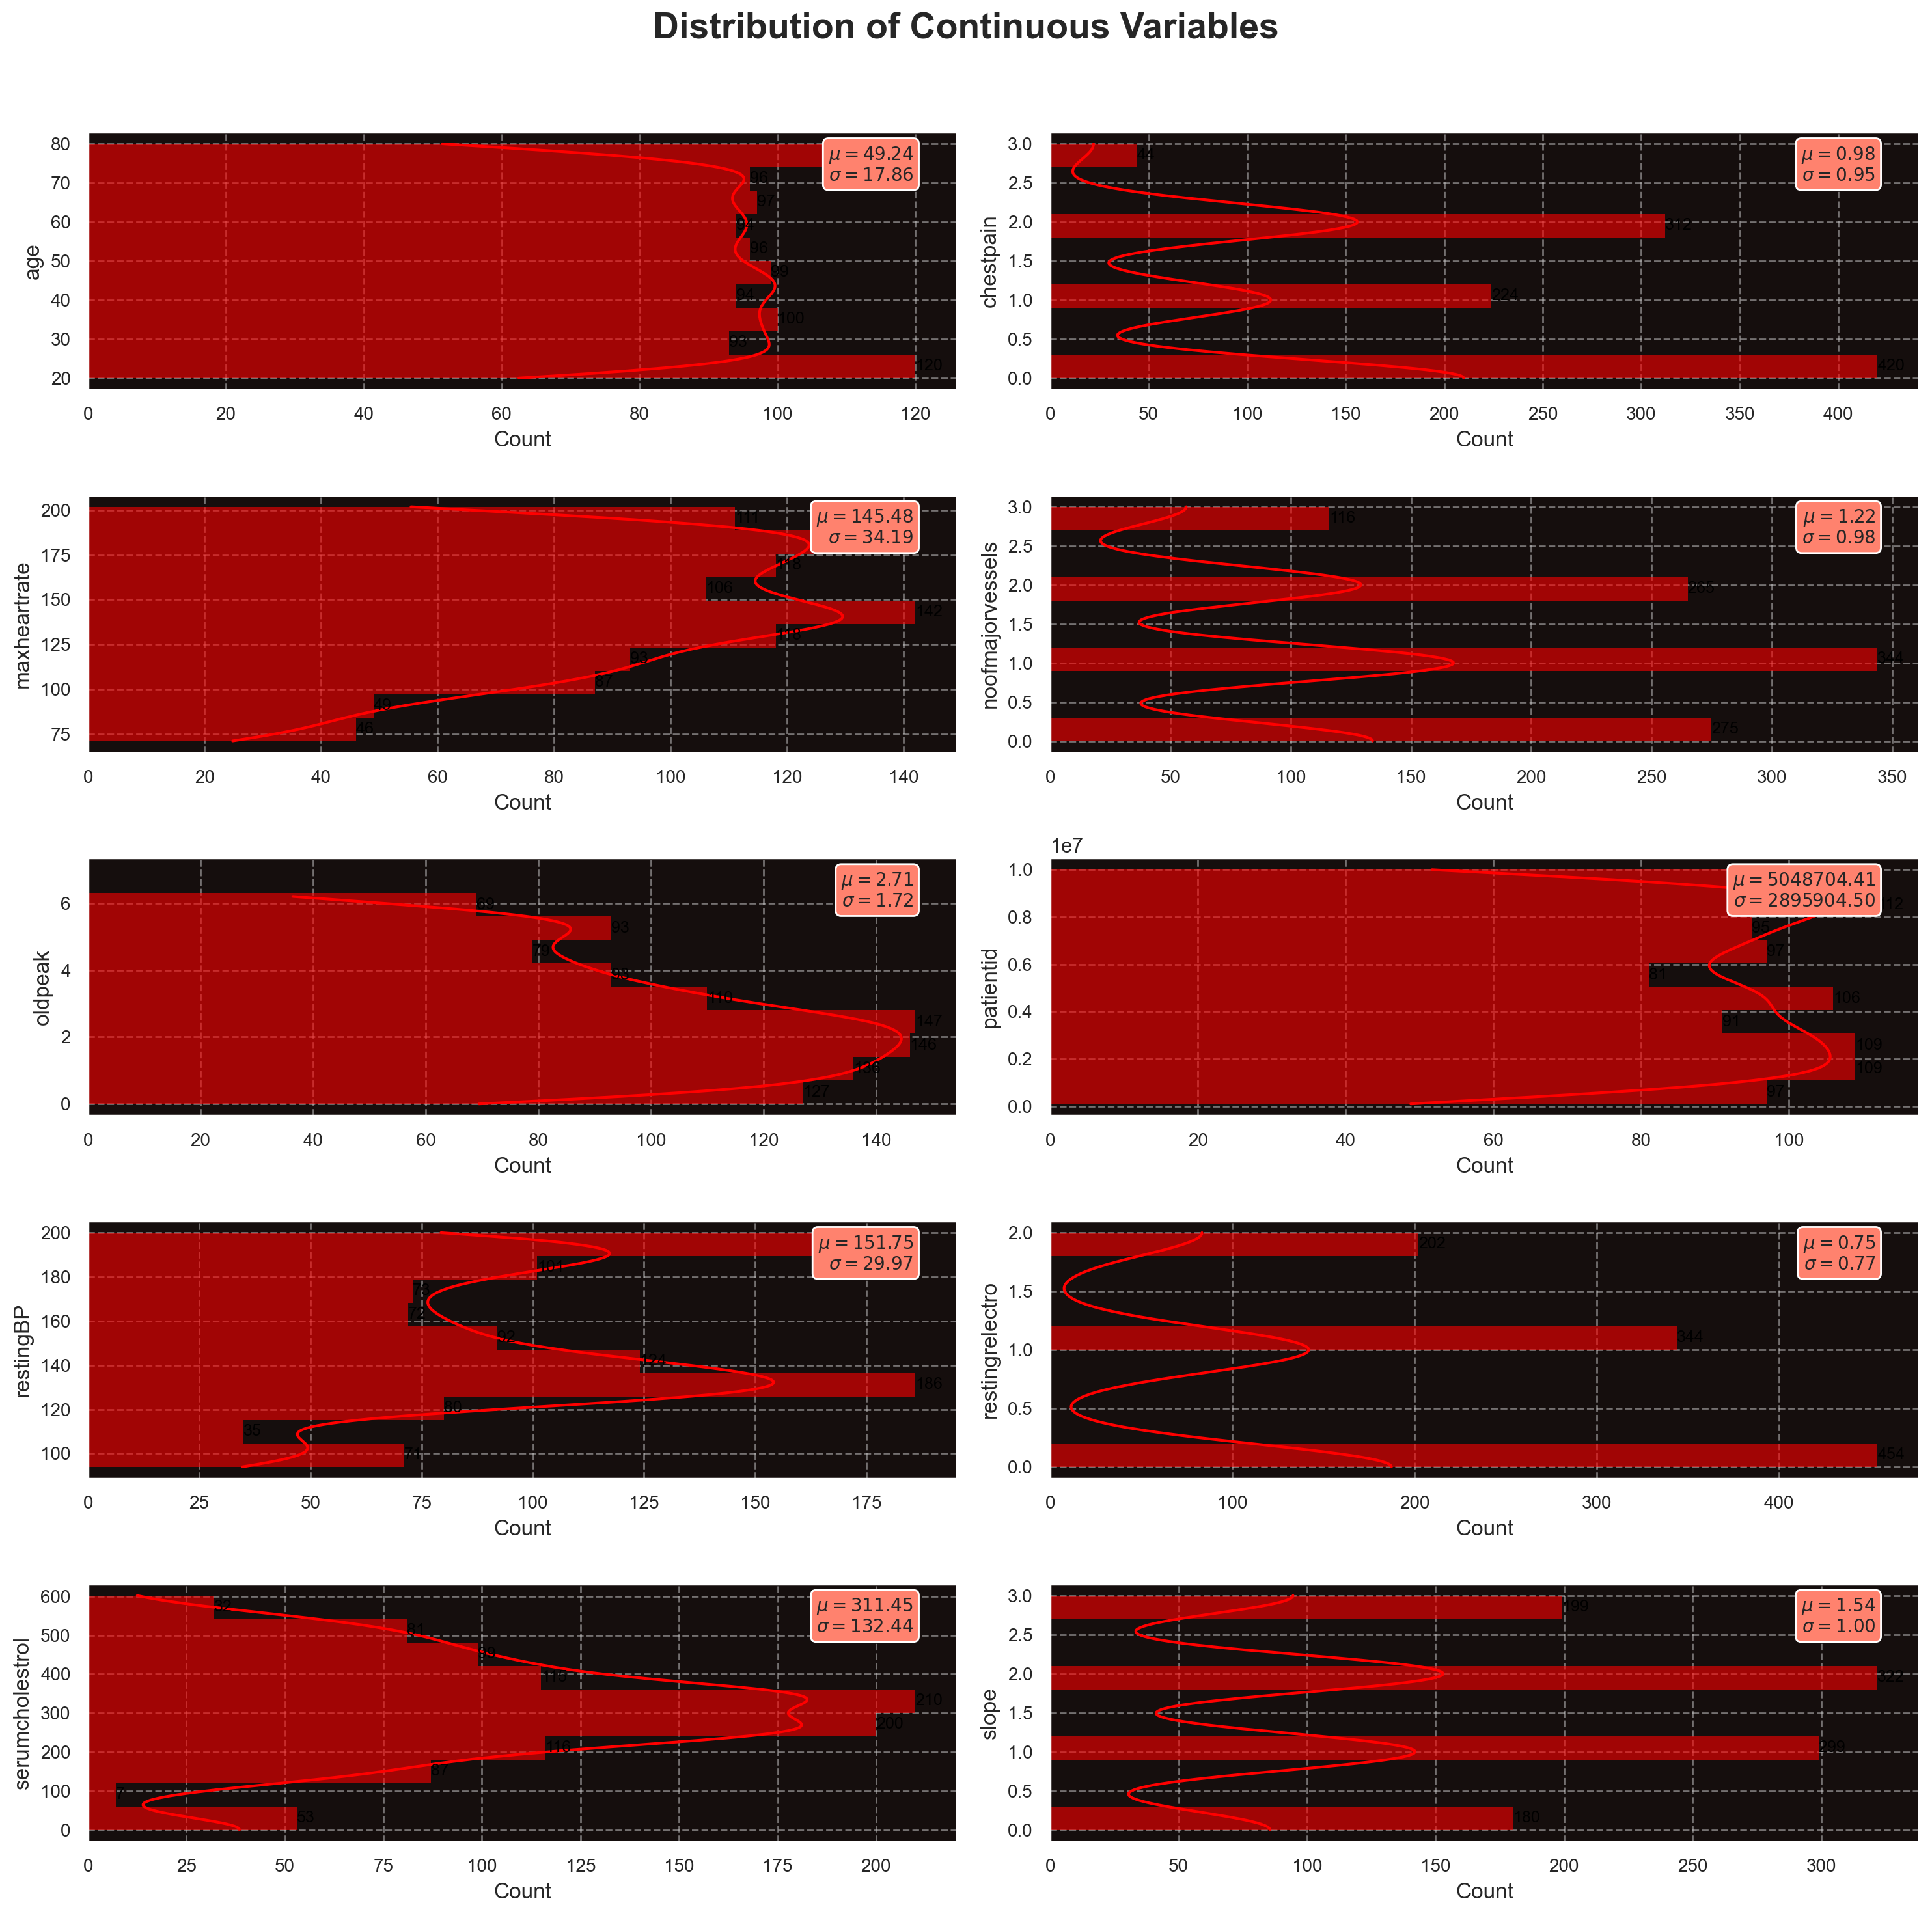

In [14]:
'''num_features=df.columns.difference(obj_features)
# Filter out continuous features for the univariate analysis
df_continuous = df[num_features]

# Set up the subplot
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
import math
# Loop to plot histograms for each continuous feature
for i, col in enumerate(df_continuous.columns):
    x =math.ceil(( i+1)/2)
    y = 1 if (i % 2) == 0 else 2
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data=df_continuous, y=col, bins=bin_edges, kde=True, ax=ax[y,x],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[y,x].set_xlabel(col, fontsize=15)
    ax[y,x].set_ylabel('Count', fontsize=12)
    ax[y,x].set_xticks(np.round(bin_edges, 1))
    ax[y,x].set_xticklabels(ax[y,x].get_xticks(), rotation=45)
    ax[y,x].grid(color='lightgrey')
    
    for j, p in enumerate(graph.patches):
        ax[y,x].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")
    
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[y,x].text(0.75, 0.9, textstr, transform=ax[y,x].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()'''


import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

num_features = df.columns.difference(obj_features)
df_continuous = df[num_features]

# Set up subplots
n_rows, n_cols = 5, 2
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
ax = ax.flatten()

# Loop through features
for i, col in enumerate(df_continuous.columns):
    # Compute histogram bins
    values, bin_edges = np.histogram(df_continuous[col], 
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    # Histogram with KDE
    sns.histplot(data=df_continuous, y=col, bins=bin_edges, kde=True,
                 ax=ax[i], edgecolor='none', color='red', alpha=0.6)

    # X/Y labels and formatting
    ax[i].set_xlabel('Count', fontsize=12)
    ax[i].set_ylabel(col, fontsize=12)
    ax[i].tick_params(labelsize=10)
    ax[i].grid(color='lightgrey', linestyle='--', alpha=0.5)

    # Annotate bars
    for p in ax[i].patches:
        width = p.get_width()
        if width > 0:
            ax[i].annotate(f'{int(width)}', (width, p.get_y() + p.get_height() / 2),
                           ha='left', va='center', fontsize=9, color='black')

    # Add mean and std box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[i].text(0.95, 0.95, textstr, transform=ax[i].transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white'))

# Turn off unused subplots if any
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])

plt.suptitle('Distribution of Continuous Variables', fontsize=20, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




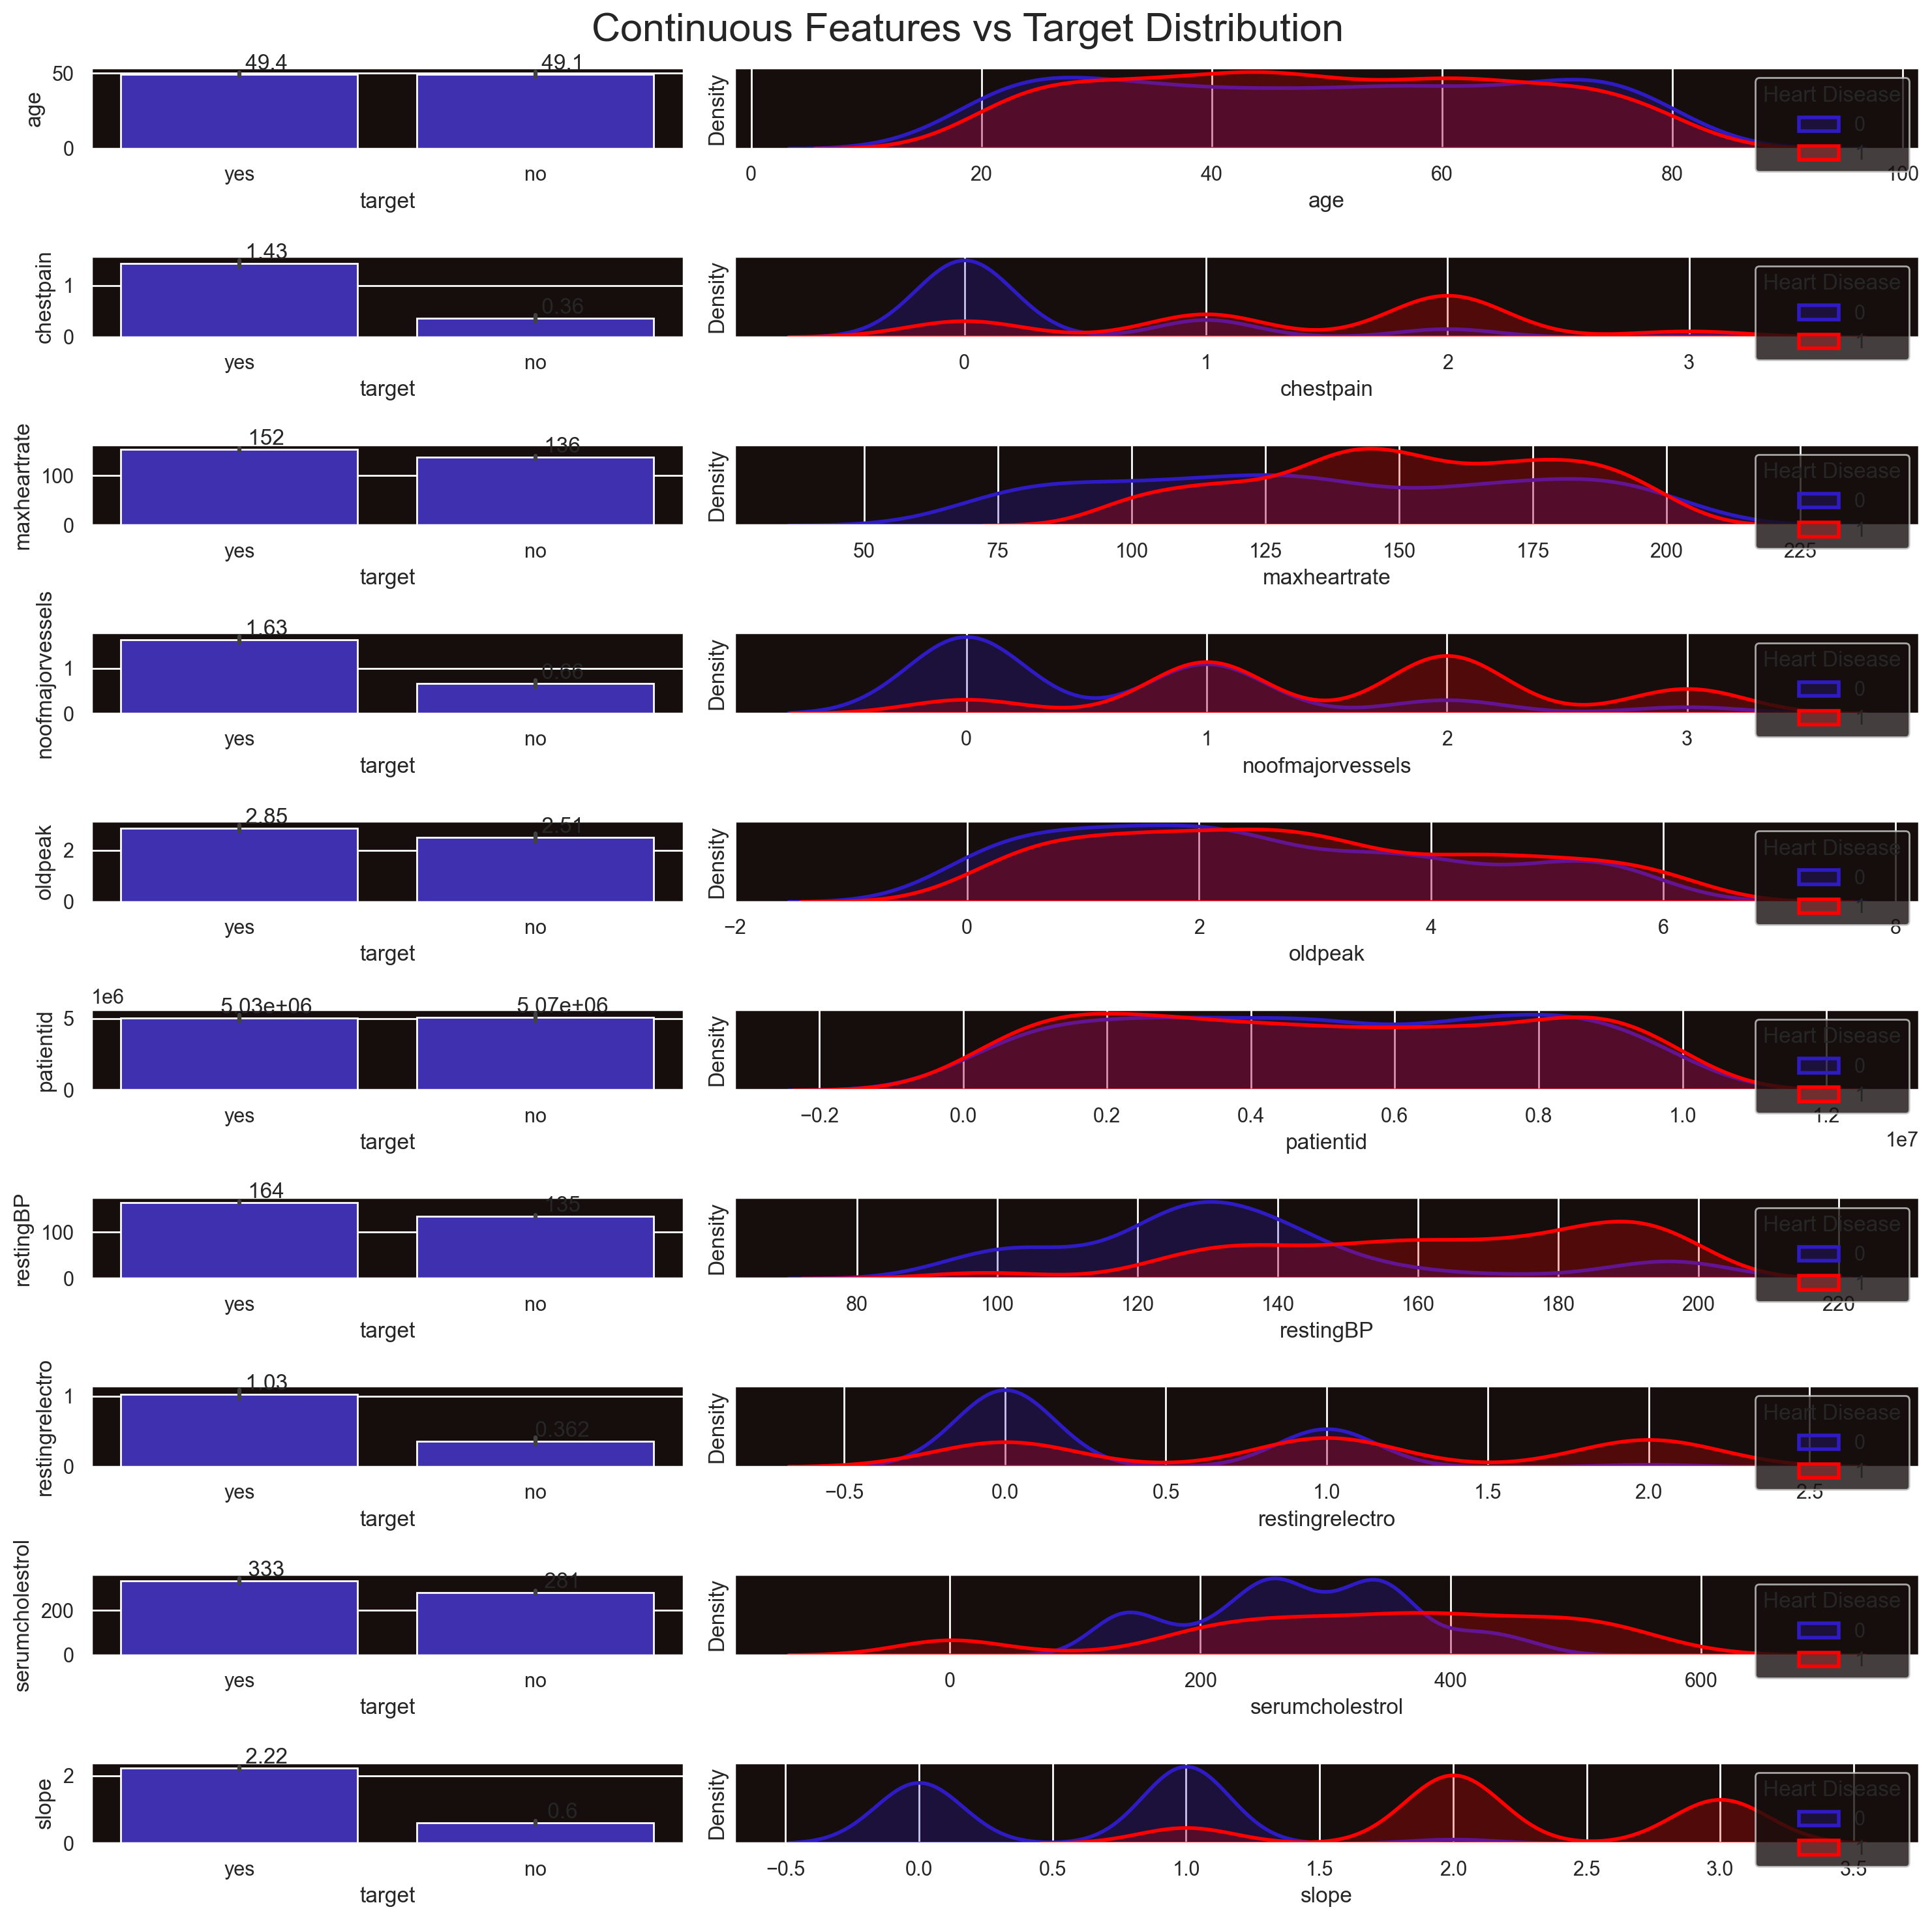

In [15]:
# Set color palette
sns.set_palette(["#2f1bc4", 'red'])

# Create the subplots
fig, ax = plt.subplots(len(num_features), 2, figsize=(15,15), gridspec_kw={'width_ratios': [1, 2]})

# Loop through each continuous feature to create barplots and kde plots
for i, col in enumerate(num_features):
    # Barplot showing the mean value of the feature for each target category
    graph = sns.barplot(data=df, x="target", y=col, ax=ax[i,0])
    
    # KDE plot showing the distribution of the feature for each target category
    sns.kdeplot(data=df[df["target"]=='no'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df["target"]=='yes'], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Heart Disease', loc='upper right')
    
    # Add mean values to the barplot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
# Set the title for the entire figure
plt.suptitle('Continuous Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

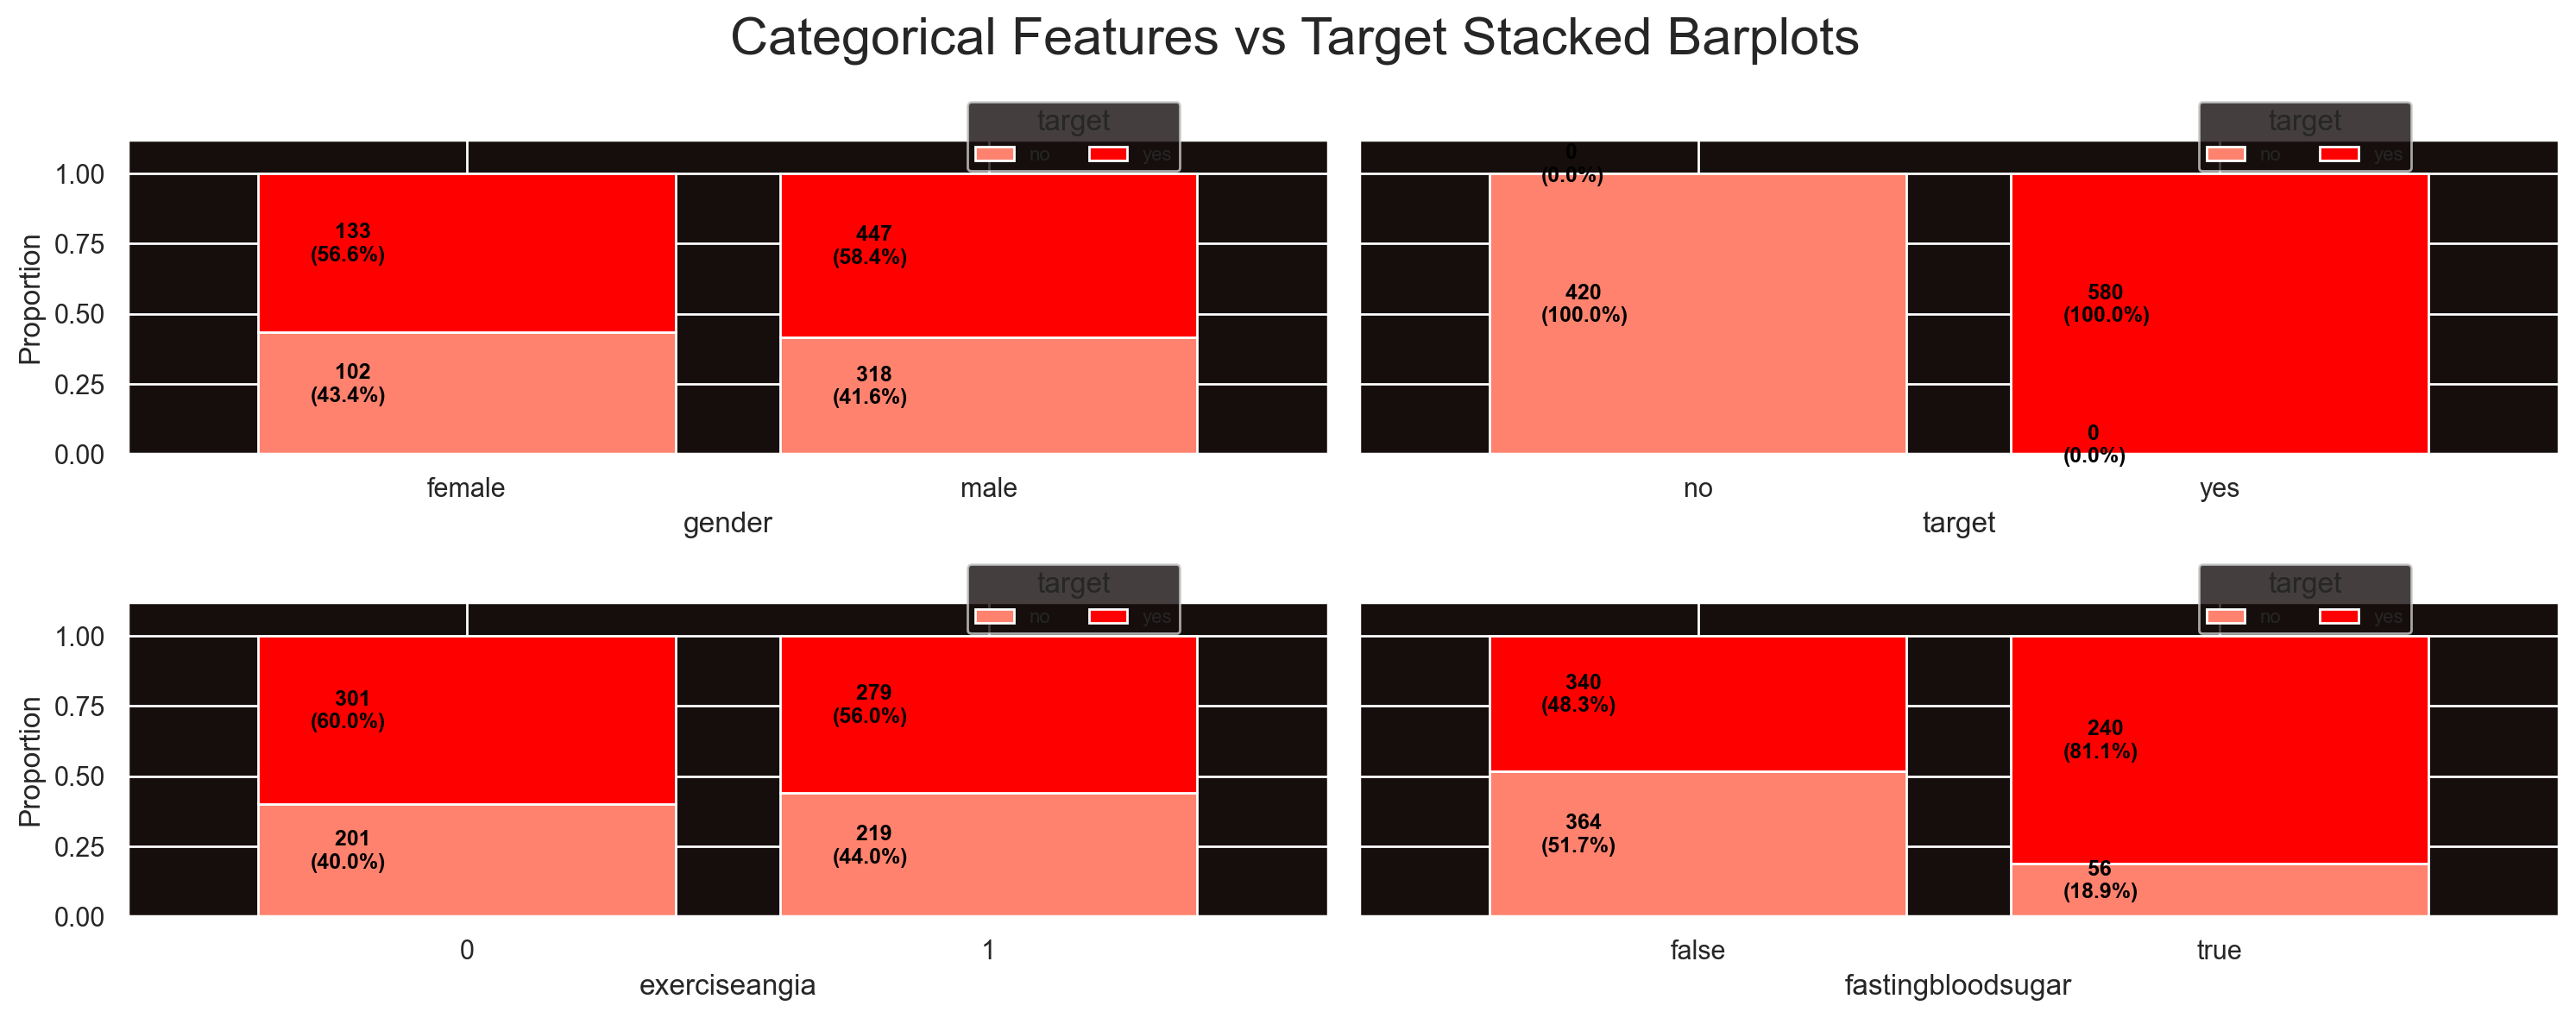

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,6))
from matplotlib.colors import ListedColormap
for i,col in enumerate(obj_features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df['target'])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df['target'], normalize='index')

    # Define colormap
    cmp = ListedColormap(['#ff826e', 'red'])
    
    # Plot stacked bar charts
    x, y = i//2, i%2
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.3, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'    {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='target', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    
            
plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

In [17]:
Q1 = df[num_features].quantile(0.25)
Q3 = df[num_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[num_features] < (Q1 - 1.5 * IQR)) | (df[num_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age                 0
chestpain           0
maxheartrate        0
noofmajorvessels    0
oldpeak             0
patientid           0
restingBP           0
restingrelectro     0
serumcholestrol     0
slope               0
dtype: int64

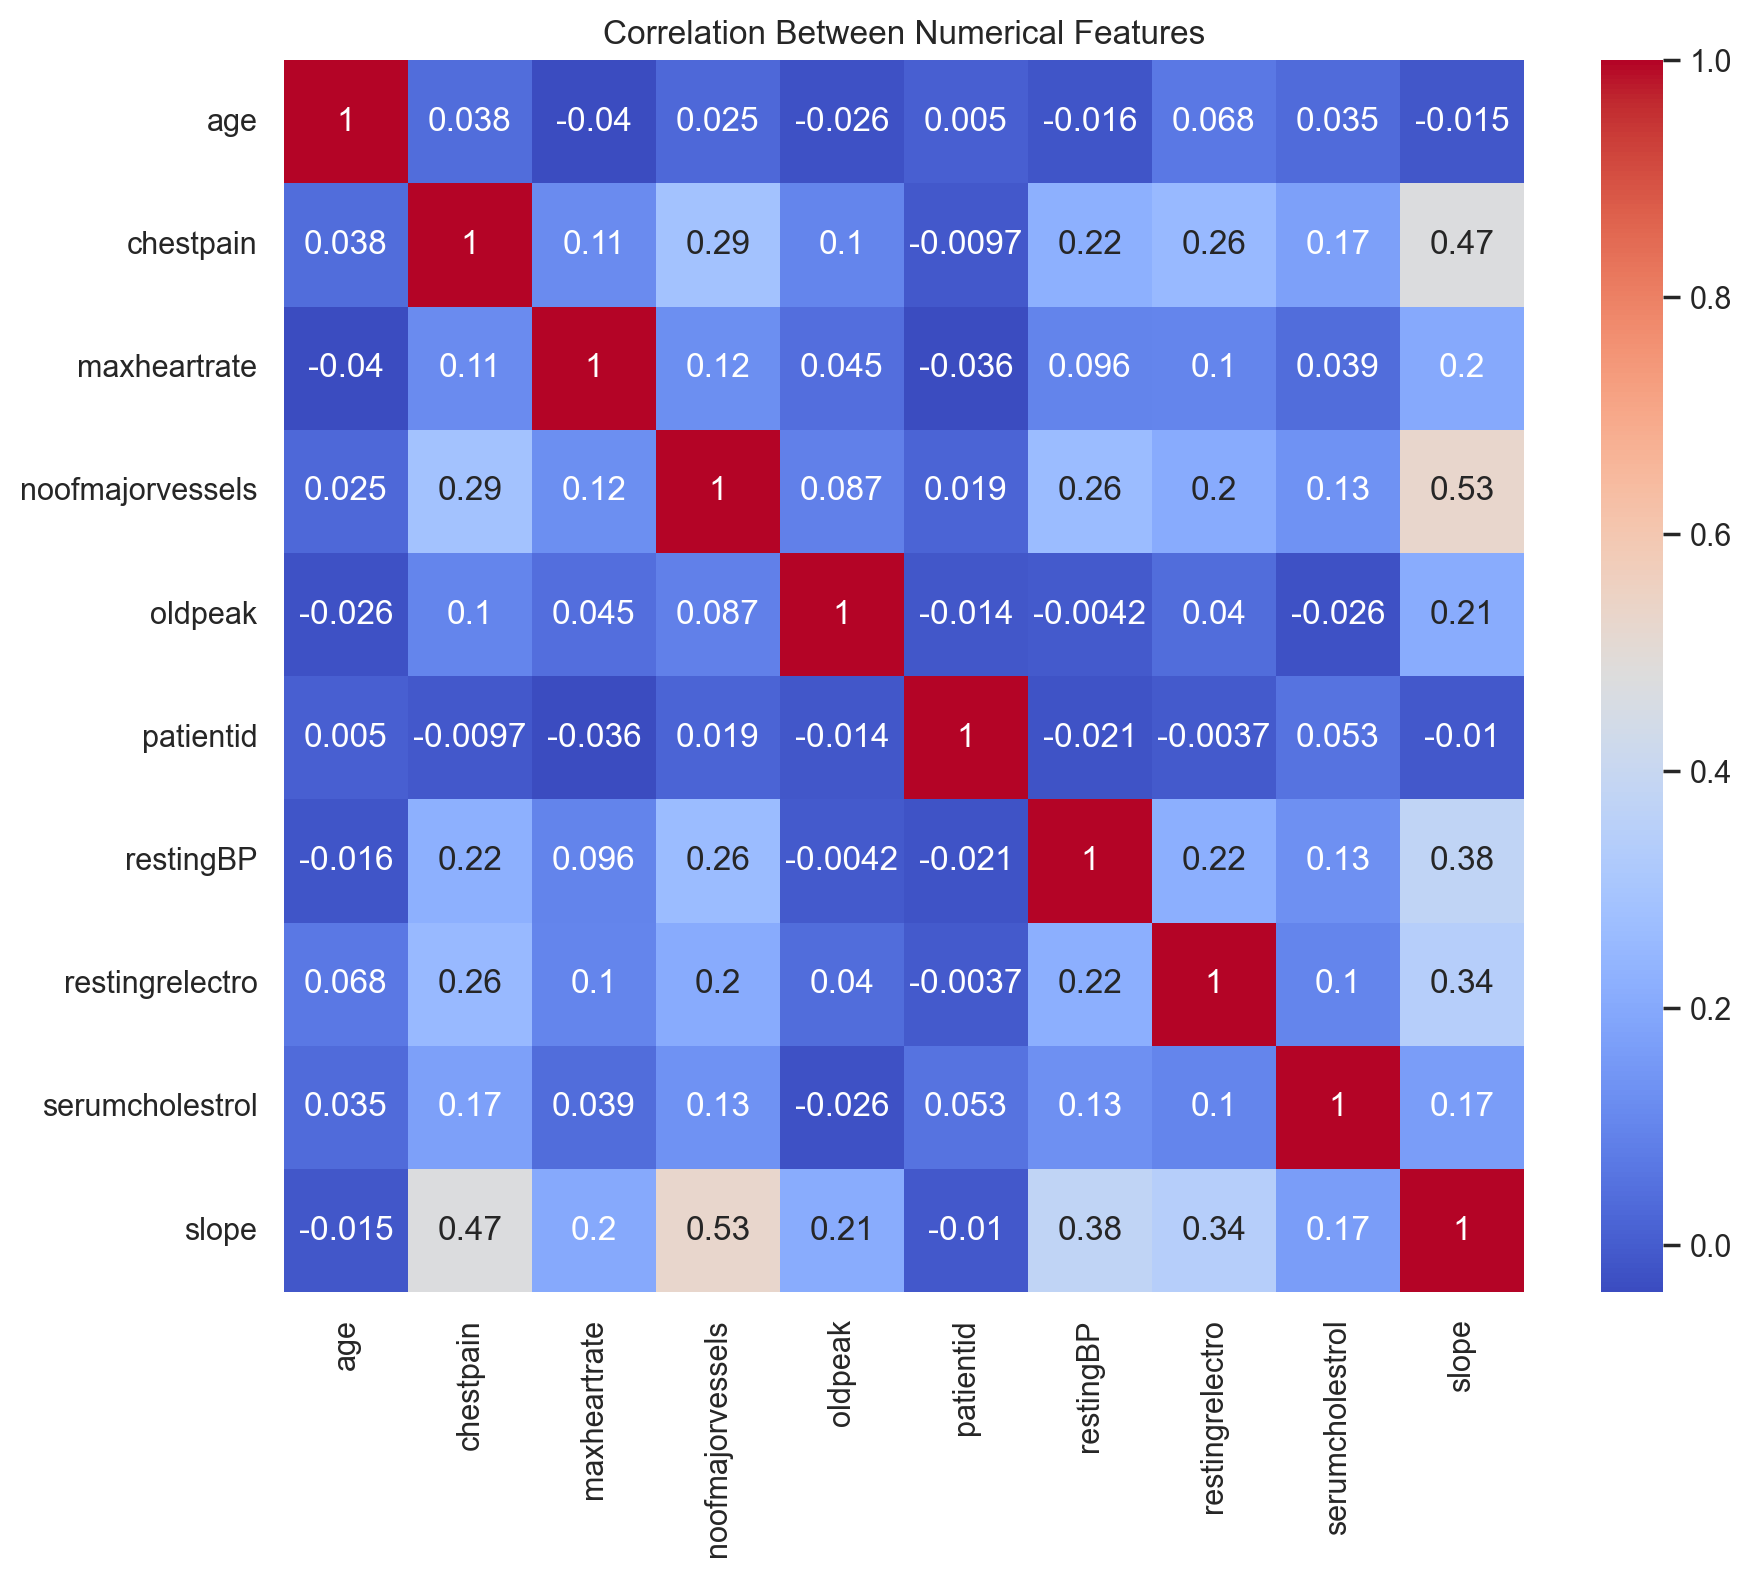

In [18]:
corr = df[num_features].corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

In [19]:
X = df.drop(['target'], axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [20]:
categs=X.select_dtypes(include='object').columns.tolist()
nums=X.select_dtypes(exclude='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categs,),
        ('num', StandardScaler(), nums)
    ])


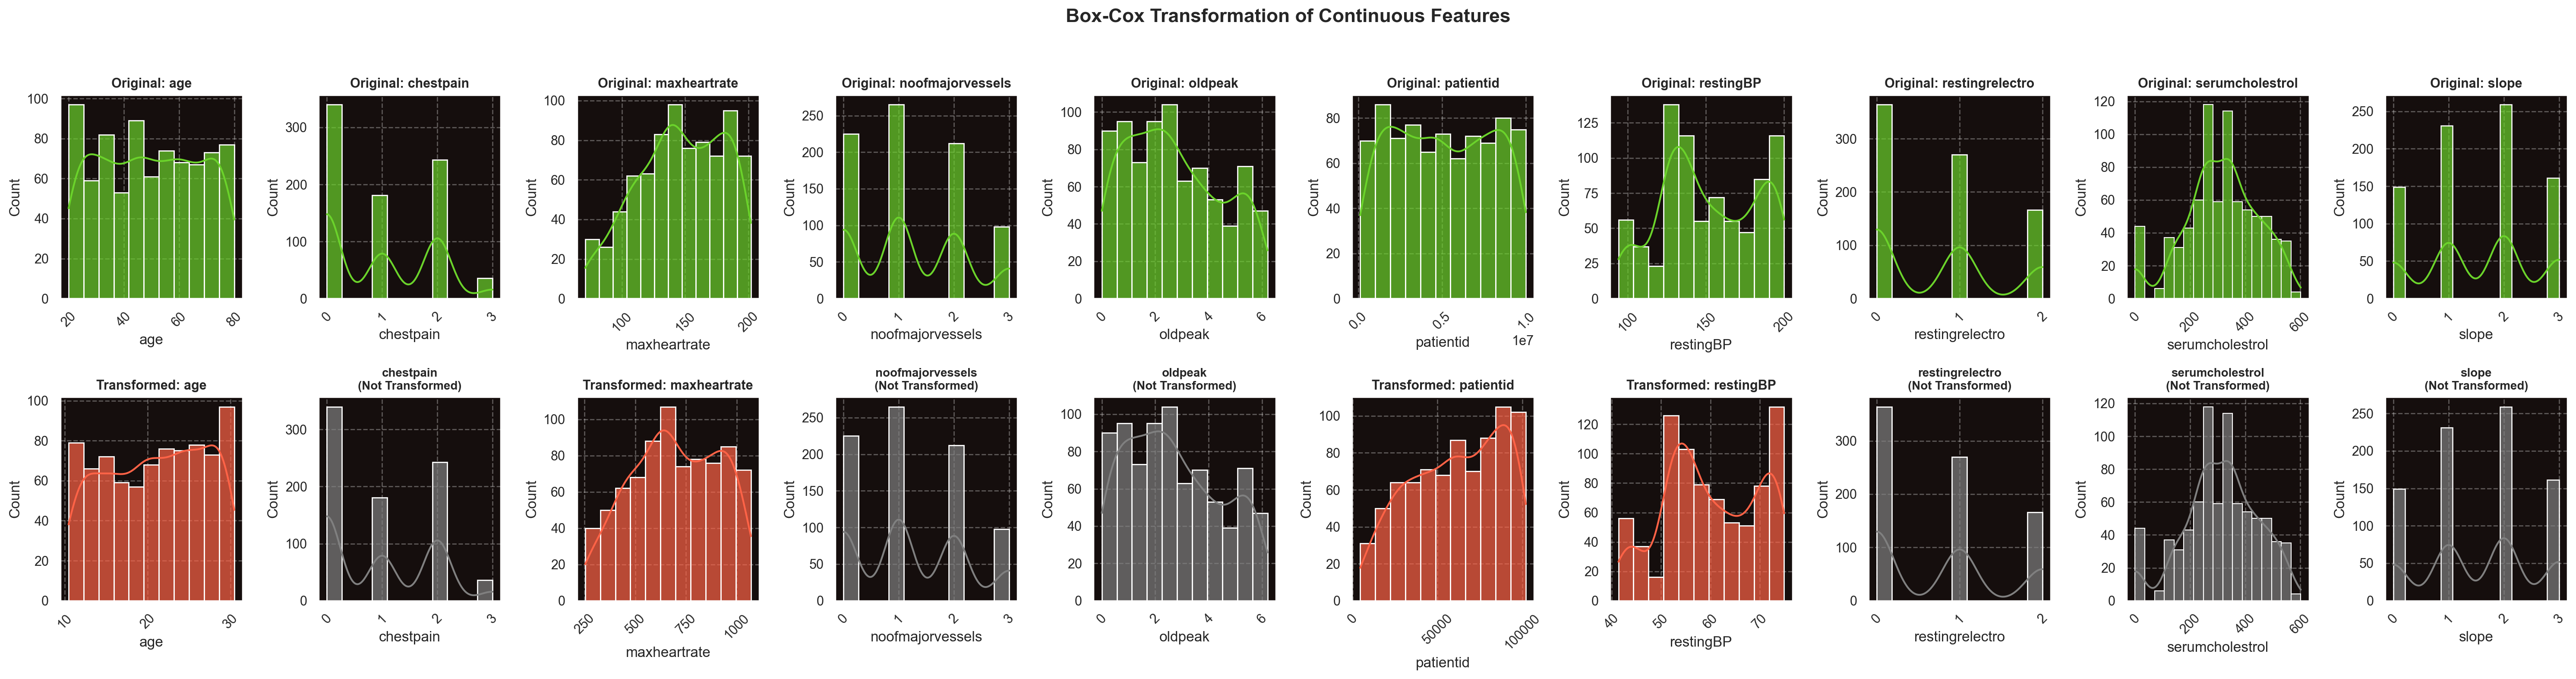

In [23]:
n_feats = len(num_features)
n_cols = 5
n_rows = math.ceil(n_feats / n_cols)

# Set up plot grid: 2 rows (Original + Transformed), n_feats columns
fig, ax = plt.subplots(2, n_feats, figsize=(n_feats * 3, 8))  # Dynamic sizing

# Store Box-Cox lambdas
lambdas = {}
from scipy.stats  import boxcox
# Plot original & transformed
for i, col in enumerate(num_features):
    # Plot original
    sns.histplot(x_train[col], kde=True, ax=ax[0, i], color="#6bd32b", alpha=0.7)
    ax[0, i].set_title(f'Original: {col}', fontsize=11, weight='bold')
    ax[0, i].tick_params(axis='x', labelrotation=45)
    ax[0, i].grid(True, linestyle='--', alpha=0.3)
    
    # Transform only if values are positive
    if x_train[col].min() > 0:
        x_train[col], lambdas[col] = boxcox(x_train[col])
        x_test[col] = boxcox(x_test[col], lmbda=lambdas[col])
        sns.histplot(x_train[col], kde=True, ax=ax[1, i], color='tomato', alpha=0.7)
        ax[1, i].set_title(f'Transformed: {col}', fontsize=11, weight='bold')
    else:
        sns.histplot(x_train[col], kde=True, ax=ax[1, i], color='gray', alpha=0.7)
        ax[1, i].set_title(f'{col}\n(Not Transformed)', fontsize=10, weight='bold')
    
    ax[1, i].tick_params(axis='x', labelrotation=45)
    ax[1, i].grid(True, linestyle='--', alpha=0.3)

# Beautify layout
fig.suptitle('Box-Cox Transformation of Continuous Features', fontsize=16, weight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
x_train.shape
x_train


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
27,11137.528541,18.732445,male,0,61.999827,0,false,2,1026.037002,0,4.2,2,2
945,98303.285666,23.940389,male,1,44.147972,357,false,1,278.636068,1,1.8,0,0
196,33676.062400,27.869521,male,0,62.926987,501,false,0,1004.506315,0,0.8,2,3
867,92850.976847,30.183860,male,2,57.617010,219,false,1,351.689957,1,1.3,1,2
187,32240.676241,15.552775,male,0,60.445366,372,false,2,716.787729,1,0.6,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,49517.480933,27.575091,male,2,53.457283,197,false,0,864.218759,0,3.7,2,1
160,29300.915557,26.385028,female,0,57.617010,209,false,1,423.465592,1,1.8,1,0
871,93065.576629,19.072961,female,1,61.379440,410,true,1,498.717771,0,0.2,0,2
878,93674.935764,21.070635,male,1,71.991312,0,false,1,756.248405,0,5.1,2,3


<a id="dt"></a>
<h2 style="color:white; background-color:purple; text-align:center; padding:10px; border-radius:10px;">
Step 7 | Decision Tree Model Building
</h2>


In [25]:

# Create pipeline with preprocessing and classifier
dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])
dt.fit(x_train,y_train)
def tune_clf_hyperparameters(clf, param_grid,x_train, y_train, scoring='recall', n_splits=3):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(x_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters
param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [2, 3],
    'classifier__min_samples_split': [2, 3, 4],
    'classifier__min_samples_leaf': [1, 2]
}


best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt, param_grid_dt, x_train, y_train)

print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

d:\intern code aloha\ml\car\havenv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(


DT Optimal Hyperparameters: 
 {'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_train, best_dt.predict(x_train)))

              precision    recall  f1-score   support

          no       0.86      0.96      0.91       337
         yes       0.97      0.88      0.92       463

    accuracy                           0.92       800
   macro avg       0.91      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



In [27]:

print(classification_report(y_test, best_dt.predict(x_test)))

              precision    recall  f1-score   support

          no       0.84      1.00      0.91        83
         yes       1.00      0.86      0.93       117

    accuracy                           0.92       200
   macro avg       0.92      0.93      0.92       200
weighted avg       0.93      0.92      0.92       200



In [35]:
def evaluate_model(model, x_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(x_test)
    print(y_pred)
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["no"]["precision"],
        "precision_1": report["yes"]["precision"],
        "recall_0": report["no"]["recall"],
        "recall_1": report["yes"]["recall"],
        "f1_0": report["no"]["f1-score"],
        "f1_1": report["yes"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    dff = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return dff

dt_evaluation = evaluate_model(best_dt, x_test, y_test, 'DT')
dt_evaluation


['yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no'
 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes'
 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no'
 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'ye

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.84,1.0,1.0,0.86,0.91,0.93,0.92,0.93,0.92,0.92



<a id="rf"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:100%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>



In [29]:
rf=Pipeline(steps=[('preprocessor',preprocessor),('classifier',RandomForestClassifier(random_state=42))])
rf.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender',
                                                   'fastingbloodsugar']),
                                                 ('num', StandardScaler(),
                                                  ['patientid', 'age',
                                                   'chestpain', 'restingBP',
                                                   'serumcholestrol',
                                                   'restingrelectro',
                                                   'maxheartrate',
                                                   'exerciseangia', 'oldpeak',
                                                   'slope',
                                                   'noofmajorvessels'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [31]:
param_grid_rf = {
    'classifier__n_estimators': [10, 30, 50, 70, 100],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [2, 3, 4],
    'classifier__min_samples_split': [2, 3, 4, 5],
    'classifier__min_samples_leaf': [1, 2, 3],
    'classifier__bootstrap': [True, False]
}
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf, param_grid_rf, x_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

d:\intern code aloha\ml\car\havenv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan na

RF Optimal Hyperparameters: 
 {'classifier__bootstrap': True, 'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10}


In [33]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(x_train)))
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(x_test)))

              precision    recall  f1-score   support

          no       0.88      0.96      0.92       337
         yes       0.97      0.90      0.94       463

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800

              precision    recall  f1-score   support

          no       0.86      1.00      0.93        83
         yes       1.00      0.89      0.94       117

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



In [36]:
rf_evaluation = evaluate_model(best_rf, x_test, y_test, 'RF')
rf_evaluation

['yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'no' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no'
 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no'
 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes'
 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'yes' 'yes'
 'no' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'yes' 'yes' 'no'
 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'no' 'yes' 'no' 'no' 'yes'
 'no' 'yes' 'yes' 'yes' 'no' 'yes' 'yes' 'yes' 'no' 'yes' 

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.86,1.0,1.0,0.89,0.93,0.94,0.93,0.94,0.93,0.94


<a id="knn"></a>
# <p style="background-color:purple; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | KNN Model Building</p>

⬆️ [Tabel of Contents](#contents_tabel)

In [44]:
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])
knn_param_grid = {
    'classifier__n_neighbors': list(range(1, 12)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2]  # 1: Manhattan distance, 2: Euclidean distance
}
best_knn, best_knn_hyperparams = tune_clf_hyperparameters(knn_pipeline, knn_param_grid, x_train, y_train)
print('KNN Optimal Hyperparameters: \n', best_knn_hyperparams)

d:\intern code aloha\ml\car\havenv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


KNN Optimal Hyperparameters: 
 {'classifier__n_neighbors': 1, 'classifier__p': 1, 'classifier__weights': 'uniform'}


In [45]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_knn.predict(x_train)))
print(classification_report(y_test, best_knn.predict(x_test)))
knn_evaluation = evaluate_model(best_knn, x_test, y_test, 'KNN')
knn_evaluation

              precision    recall  f1-score   support

          no       1.00      1.00      1.00       337
         yes       1.00      1.00      1.00       463

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800

              precision    recall  f1-score   support

          no       0.94      0.93      0.93        83
         yes       0.95      0.96      0.95       117

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

['yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'no' 'y

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.94,0.95,0.93,0.96,0.93,0.95,0.94,0.94,0.94,0.94


In [48]:
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVC(probability=True)) 
])
param_grid_svm = {
    'svm__C': [0.0011, 0.005, 0.01, 0.05, 0.1, 1, 10, 20],
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],  
    'svm__degree': [2, 3, 4]
}
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, x_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

d:\intern code aloha\ml\car\havenv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan na

SVM Optimal Hyperparameters: 
 {'svm__C': 0.0011, 'svm__degree': 2, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [50]:
print(classification_report(y_train, best_svm.predict(x_train)))
print(classification_report(y_test, best_svm.predict(x_test)))
svm_evaluation = evaluate_model(best_svm, x_test, y_test, 'SVM')
svm_evaluation

              precision    recall  f1-score   support

          no       0.95      0.88      0.92       337
         yes       0.92      0.97      0.94       463

    accuracy                           0.93       800
   macro avg       0.93      0.92      0.93       800
weighted avg       0.93      0.93      0.93       800

              precision    recall  f1-score   support

          no       0.95      0.95      0.95        83
         yes       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200

['yes' 'yes' 'no' 'no' 'yes' 'no' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'yes' 'yes' 'no'
 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'no' 'no' 'no' 'no'
 'yes' 'yes' 'no' 'no' 'yes' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no'
 'yes' 'yes' 'yes' 'yes' 'yes' 'no' 'yes' 'no' 'yes' 'ye

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.95,0.97,0.95,0.97,0.95,0.97,0.96,0.96,0.96,0.96


In [54]:
svm_evaluation.head()

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.95,0.97,0.95,0.97,0.95,0.97,0.96,0.96,0.96,0.96


In [53]:
rf_evaluation.head()

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
RF,0.86,1.0,1.0,0.89,0.93,0.94,0.93,0.94,0.93,0.94


In [55]:
knn_evaluation.head()

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
KNN,0.94,0.95,0.93,0.96,0.93,0.95,0.94,0.94,0.94,0.94


In [56]:
dt_evaluation.head()

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
DT,0.84,1.0,1.0,0.86,0.91,0.93,0.92,0.93,0.92,0.92


In [63]:
results=pd.concat([rf_evaluation,dt_evaluation,knn_evaluation,svm_evaluation])
results = results.sort_values(by='recall_1', ascending=False).round(2)
results


,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,macro_avg_recall,macro_avg_f1,accuracy
SVM,0.95,0.97,0.95,0.97,0.95,0.97,0.96,0.96,0.96,0.96
KNN,0.94,0.95,0.93,0.96,0.93,0.95,0.94,0.94,0.94,0.94
RF,0.86,1.00,1.00,0.89,0.93,0.94,0.93,0.94,0.93,0.94
DT,0.84,1.00,1.00,0.86,0.91,0.93,0.92,0.93,0.92,0.92


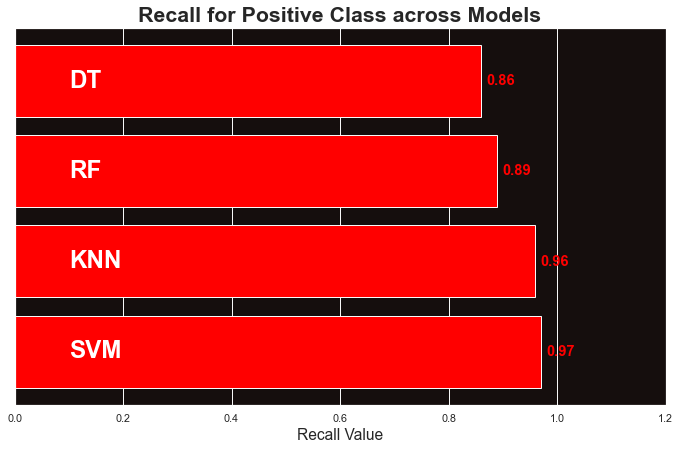

In [66]:
recall_1_scores=results['recall_1']
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')
# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

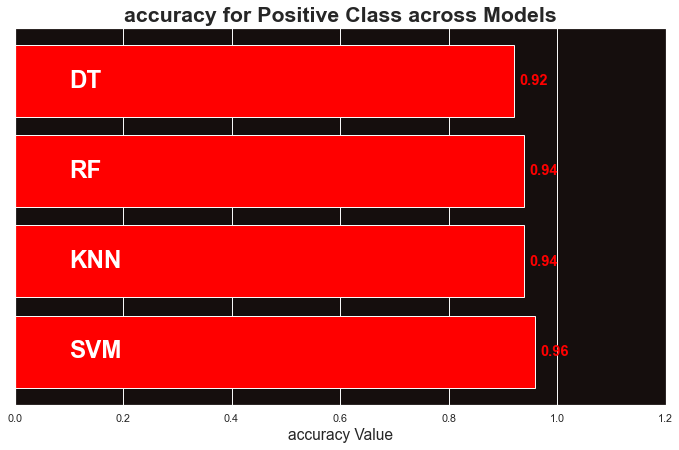

In [67]:
accuracy_scores=results['accuracy']
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, accuracy_scores, color='red')
# Annotate the values and indexes
for i, (value, name) in enumerate(zip(accuracy_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("accuracy for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('accuracy Value', fontsize=16)
plt.show()